# Лабораторная работа №1 Кокозов

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

### Загрузка данных

In [2]:
data = pd.read_csv('ginf.csv', sep = ',' )

## 2)Основные характеристики датасета

In [3]:
# Первые пять строк датасета
data.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [4]:
# Размер датасета
data.shape

(10112, 18)

In [5]:
# Количество нулевых элементов
data.isnull().sum()

id_odsp         0
link_odsp       0
adv_stats       0
date            0
league          0
season          0
country         0
ht              0
at              0
fthg            0
ftag            0
odd_h           0
odd_d           0
odd_a           0
odd_over     9135
odd_under    9135
odd_bts      9135
odd_bts_n    9135
dtype: int64

In [7]:
 # Колонки и их типы данных
data.dtypes

id_odsp       object
link_odsp     object
adv_stats       bool
date          object
league        object
season         int64
country       object
ht            object
at            object
fthg           int64
ftag           int64
odd_h        float64
odd_d        float64
odd_a        float64
odd_over     float64
odd_under    float64
odd_bts      float64
odd_bts_n    float64
dtype: object

In [9]:
# Описание датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Product_Collection                        2283 non-null   object 
 1   Vertical_Segment                          2283 non-null   object 
 2   Processor_Number                          1934 non-null   object 
 3   Status                                    2283 non-null   object 
 4   Launch_Date                               1871 non-null   object 
 5   Lithography                               2212 non-null   object 
 6   Recommended_Customer_Price                1301 non-null   object 
 7   nb_of_Cores                               2283 non-null   int64  
 8   nb_of_Threads                             1427 non-null   float64
 9   Processor_Base_Frequency                  2265 non-null   object 
 10  Max_Turbo_Frequency                 

In [8]:
# Статистические данные
data.describe()

,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
count,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,977.000000,977.000000,977.000000,977.000000
mean,2014.290249,1.548062,1.154964,2.930120,4.278434,5.537545,2.046817,2.105629,1.942917,2.063941
std,1.610074,1.309591,1.142596,2.370135,1.863643,5.700485,0.367062,0.536646,0.211102,0.251276
min,2012.000000,0.000000,0.000000,1.060000,1.910000,1.110000,1.140000,1.420000,1.410000,1.440000
25%,2013.000000,1.000000,0.000000,1.760000,3.430000,2.740000,1.790000,1.780000,1.800000,1.870000
50%,2014.000000,1.000000,1.000000,2.270000,3.680000,3.860000,2.030000,1.970000,1.920000,2.050000
75%,2016.000000,2.000000,2.000000,3.080000,4.300000,6.000000,2.280000,2.270000,2.050000,2.200000
max,2017.000000,10.000000,9.000000,46.000000,35.000000,81.000000,3.400000,7.500000,3.250000,3.460000


In [9]:
# Удаляем столбец Support_4k
data = data.drop('odd_bts_n', axis = 1)

In [10]:
# Первые пять строк датасета
data.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN


In [11]:
# Определим уникальные значения для целевого признака
data['country'].unique()

array(['germany', 'france', 'england', 'spain', 'italy'], dtype=object)

## 3) Визуальное исследование датасета

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'fthg'}>,
        <AxesSubplot:title={'center':'ftag'}>],
       [<AxesSubplot:title={'center':'odd_h'}>,
        <AxesSubplot:title={'center':'odd_d'}>,
        <AxesSubplot:title={'center':'odd_a'}>],
       [<AxesSubplot:title={'center':'odd_over'}>,
        <AxesSubplot:title={'center':'odd_under'}>,
        <AxesSubplot:title={'center':'odd_bts'}>]], dtype=object)

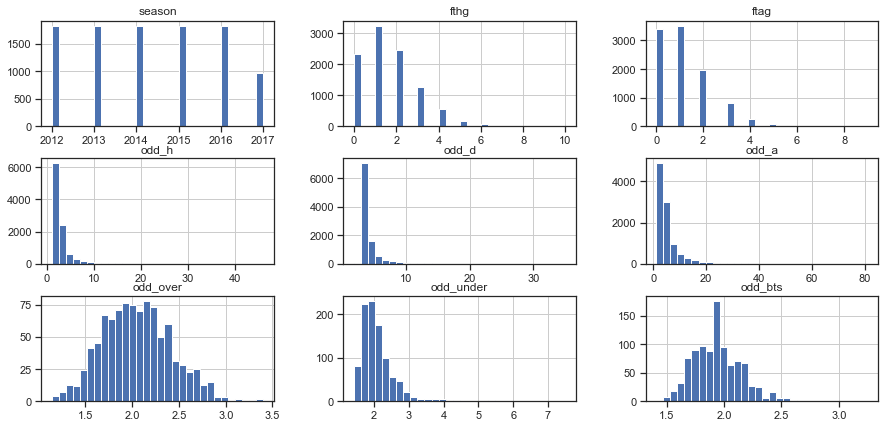

In [12]:
# Гистограммы для всех признаков
data.hist(bins=30, figsize = (15,7))

<Figure size 864x432 with 0 Axes>

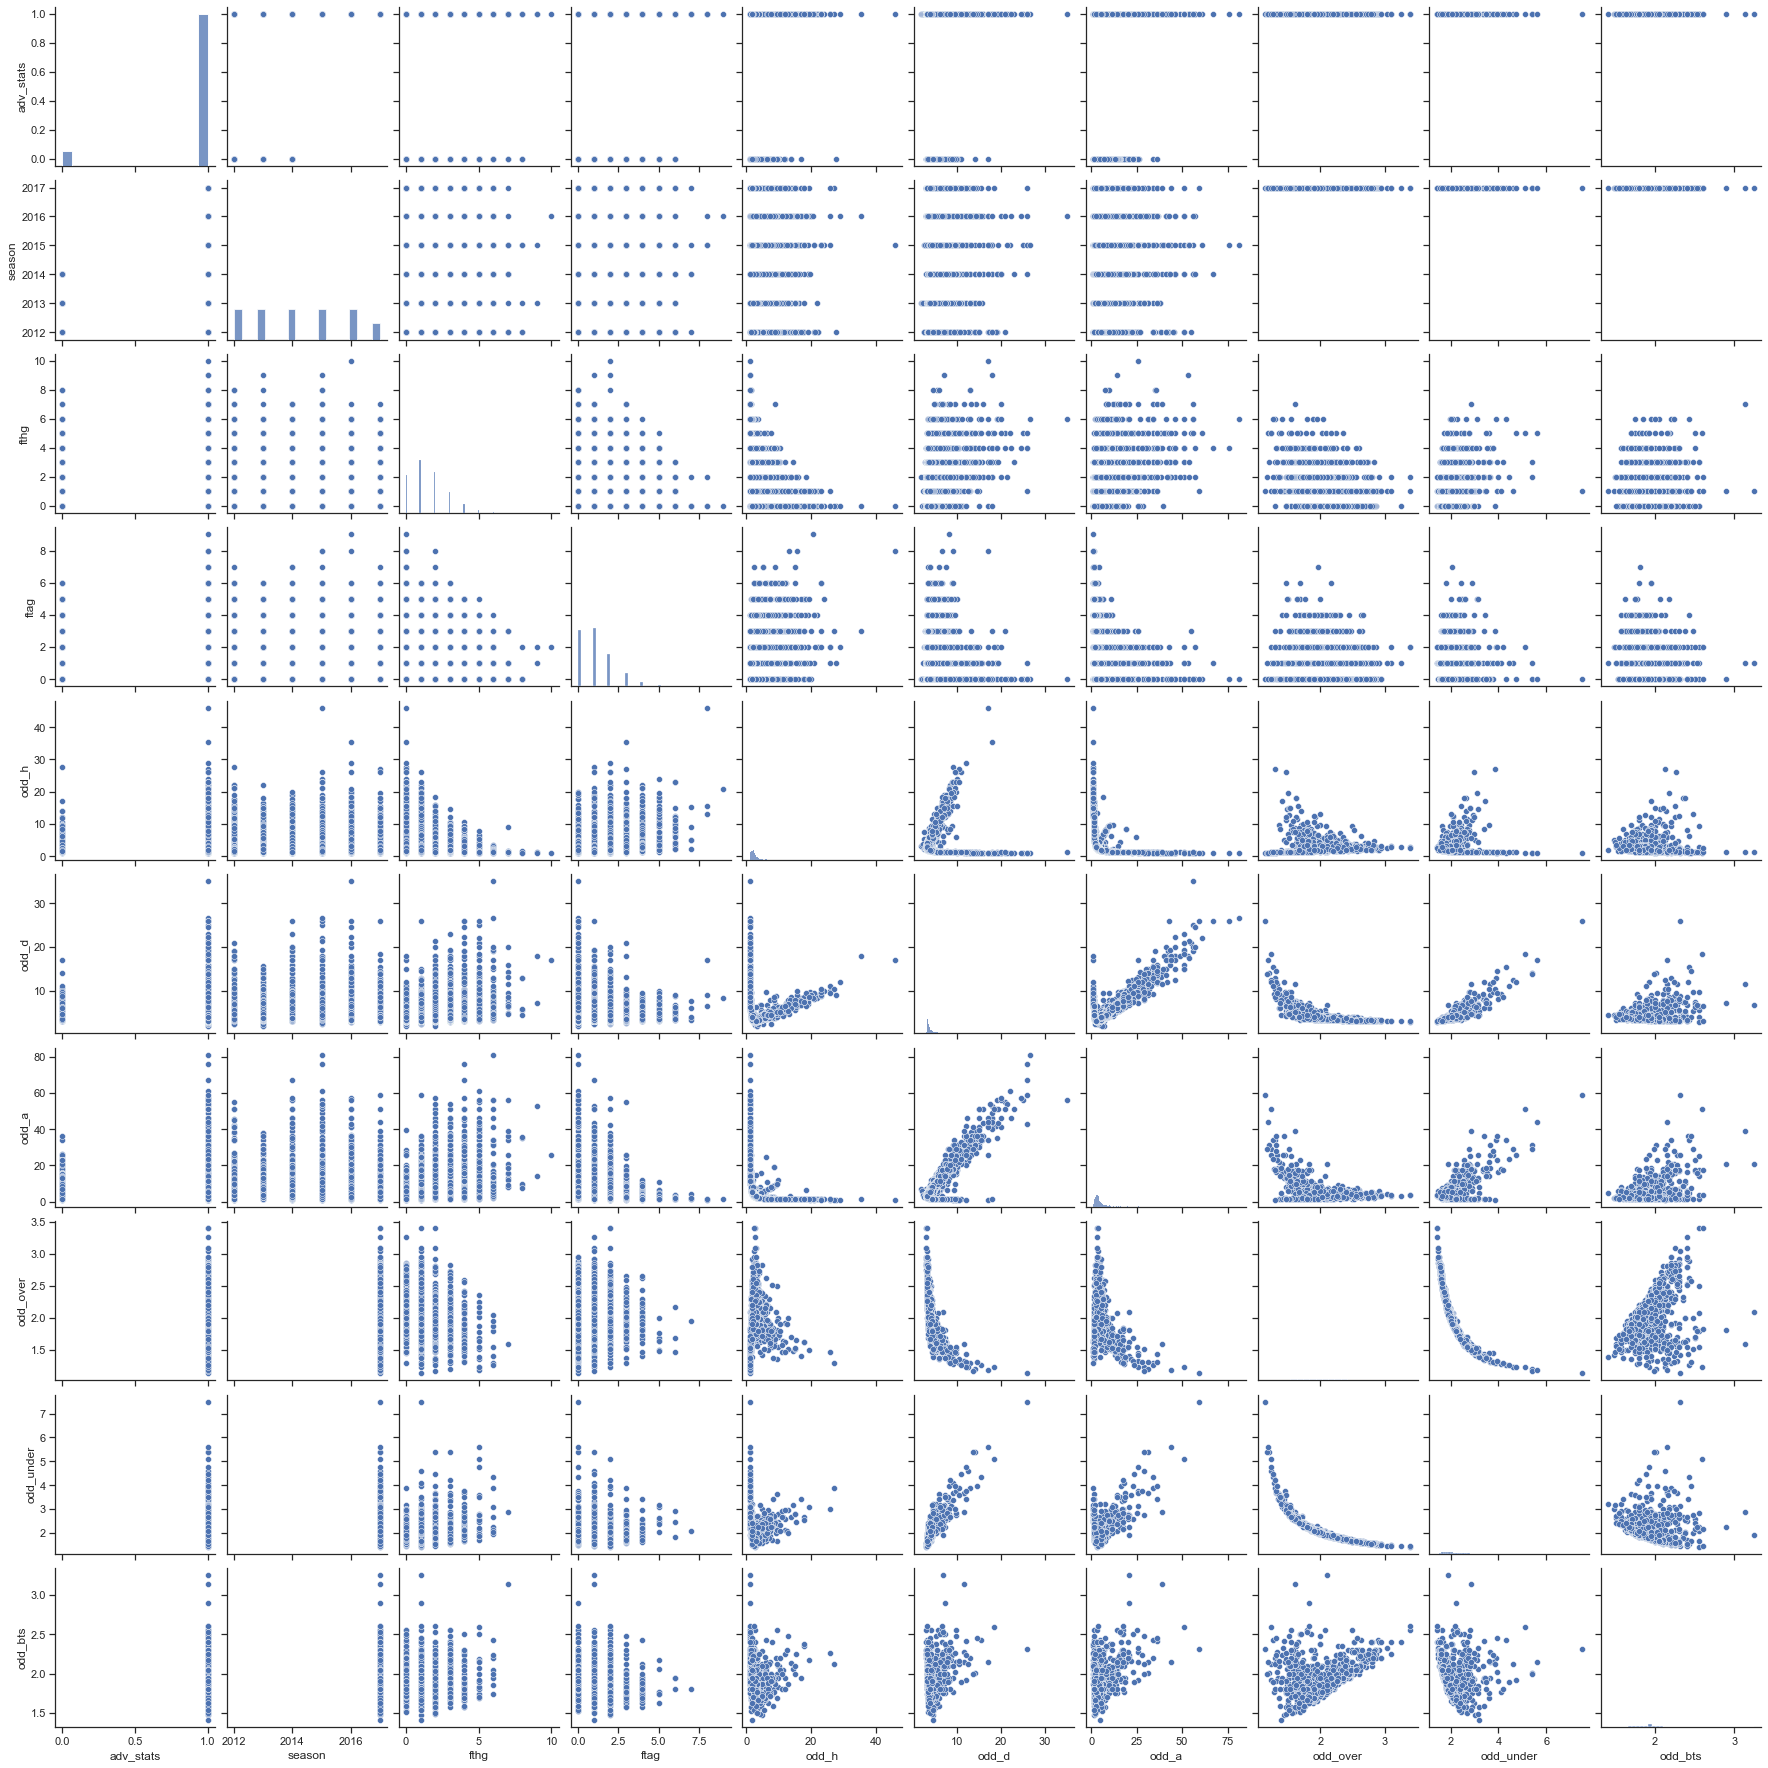

In [13]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(data)

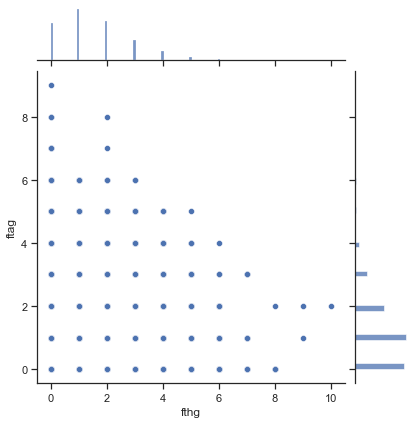

In [14]:
# Увеличенные диаграммы рассеяния для признаков, которые имеют зависимость
sns.jointplot(x = "fthg", y = "ftag", kind="scatter", data = data)

## 4) Корреляции признаков

In [15]:
corr_matrix = data.corr()

In [16]:
corr_matrix['odd_a']

adv_stats    0.006103
season       0.005069
fthg         0.361478
ftag        -0.199595
odd_h       -0.358183
odd_d        0.869377
odd_a        1.000000
odd_over    -0.457703
odd_under    0.698667
odd_bts      0.394644
Name: odd_a, dtype: float64

<AxesSubplot:>

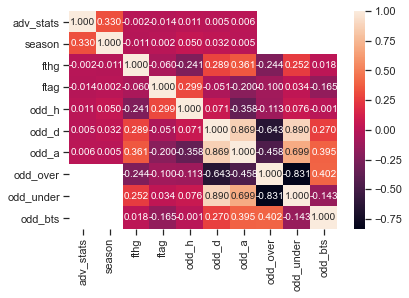

In [17]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')